In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import itertools    
from sklearn.metrics import accuracy_score
import operator
from timeit import default_timer as timer


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
df_away=pd.read_csv('./data/Train_Data/train_away_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home=pd.read_csv('./data/Train_Data/train_home_team_statistics_df.csv').drop(['LEAGUE', 'TEAM_NAME'], axis=1)
df_home.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home.columns ]


In [6]:
df_home.head()

,ID,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [7]:
df_joined=df_away.join(df_home.set_index('ID'), on='ID')
df_joined=df_joined.fillna(0.0)
df_final=df_joined.sort_values(by=['ID'])


In [8]:
df_joined.head()

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,0,4.0,1.0,4.0,1.0,5.0,4.0,3.0,6.0,4.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,4.0,3.0,4.0,3.0,8.0,8.0,7.0,8.0,5.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,4.0,3.0,4.0,2.0,6.0,4.0,4.0,1.0,6.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,0.0,0.0,0.0,0.0,1.0,3.0,3.0,8.0,1.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,0.0,6.0
4,4,5.0,4.0,5.0,6.0,5.0,6.0,6.0,4.0,5.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [9]:
df_result=pd.read_csv('./data/Train_Data/Y_train.csv')


In [10]:
df_result.head()

,ID,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,3,1,0,0
4,4,0,1,0


In [11]:
df_result.loc[df_result['DRAW'] == 1, 'result'] = 0
df_result.loc[df_result['AWAY_WINS'] == 1 , 'result'] = 1
df_result.loc[df_result['HOME_WINS'] == 1 , 'result'] = 2
df_result['result'] = df_result['result'].astype('int')
df_result_final=df_result.sort_values(by=['ID']).iloc[:,[4]]


In [12]:
df_result_final.head()

,result
0,1
1,0
2,1
3,2
4,0


In [13]:
from sklearn.model_selection import train_test_split

attribut_train,attribut_test,result_train,result_test=train_test_split(df_final, df_result_final, test_size=0.001,random_state=10)


In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
max_iter_list=[3000]
solver_list=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'] # sag and saga take a lot of time
regularization_factor_list=[1,0.1,0.01,0.001,0.0001]
accuracy_dict={}
time_dict={}
LR_dict={}
for max_iter in max_iter_list:
    for solver in solver_list:
        for regularization_factor in regularization_factor_list:
            start = timer()

            LR = LogisticRegression(max_iter=max_iter,solver=solver,C=regularization_factor).fit(attribut_train, result_train)
            yhat = LR.predict(attribut_test)
            accuracy=np.round(accuracy_score(result_test,yhat),4)
            key=f'solver_{solver}_iter_{max_iter}_C_{regularization_factor}'
            accuracy_dict[key]=accuracy
            LR_dict[key]=LR
            
            end = timer()
            print(f'for this hyperparam {key} the training took ')

            delta=end-start
            minutes = round(delta // 60)
            delta %= 60
            seconds = round(delta)
            time_str=f"{minutes:02d}m{seconds:02d}s"
            time_dict[key]=time_str
            print(time_str)               



D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

for this hyperparam solver_lbfgs_iter_3000_C_1 the training took 
00m30s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_lbfgs_iter_3000_C_0.1 the training took 
00m26s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_lbfgs_iter_3000_C_0.01 the training took 
00m26s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_lbfgs_iter_3000_C_0.001 the training took 
00m26s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_lbfgs_iter_3000_C_0.0001 the training took 
00m26s
for this hyperparam solver_liblinear_iter_3000_C_1 the training took 
00m04s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_liblinear_iter_3000_C_0.1 the training took 
00m04s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_liblinear_iter_3000_C_0.01 the training took 
00m03s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_liblinear_iter_3000_C_0.001 the training took 
00m02s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_liblinear_iter_3000_C_0.0001 the training took 
00m02s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cg_iter_3000_C_1 the training took 
00m18s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cg_iter_3000_C_0.1 the training took 
00m17s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cg_iter_3000_C_0.01 the training took 
00m11s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cg_iter_3000_C_0.001 the training took 
00m05s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cg_iter_3000_C_0.0001 the training took 
00m04s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cholesky_iter_3000_C_1 the training took 
00m01s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cholesky_iter_3000_C_0.1 the training took 
00m01s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cholesky_iter_3000_C_0.01 the training took 
00m01s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cholesky_iter_3000_C_0.001 the training took 
00m01s


D:\Dev\ML\workspace\python_tutorials\.venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


for this hyperparam solver_newton-cholesky_iter_3000_C_0.0001 the training took 
00m01s


In [15]:
accuracy_dict

{'solver_lbfgs_iter_3000_C_1': 0.4615,
 'solver_lbfgs_iter_3000_C_0.1': 0.5385,
 'solver_lbfgs_iter_3000_C_0.01': 0.6154,
 'solver_lbfgs_iter_3000_C_0.001': 0.6154,
 'solver_lbfgs_iter_3000_C_0.0001': 0.5385,
 'solver_liblinear_iter_3000_C_1': 0.6154,
 'solver_liblinear_iter_3000_C_0.1': 0.6154,
 'solver_liblinear_iter_3000_C_0.01': 0.6154,
 'solver_liblinear_iter_3000_C_0.001': 0.6154,
 'solver_liblinear_iter_3000_C_0.0001': 0.5385,
 'solver_newton-cg_iter_3000_C_1': 0.6154,
 'solver_newton-cg_iter_3000_C_0.1': 0.6154,
 'solver_newton-cg_iter_3000_C_0.01': 0.6154,
 'solver_newton-cg_iter_3000_C_0.001': 0.6154,
 'solver_newton-cg_iter_3000_C_0.0001': 0.5385,
 'solver_newton-cholesky_iter_3000_C_1': 0.6154,
 'solver_newton-cholesky_iter_3000_C_0.1': 0.6154,
 'solver_newton-cholesky_iter_3000_C_0.01': 0.6154,
 'solver_newton-cholesky_iter_3000_C_0.001': 0.6154,
 'solver_newton-cholesky_iter_3000_C_0.0001': 0.5385}

In [16]:
max_accuracy=max(accuracy_dict.items(), key=operator.itemgetter(1))
LR_best=LR_dict[max_accuracy[0]]

In [17]:
LR_best=LR_dict['solver_lbfgs_iter_3000_C_0.0001']


In [18]:
time_dict

{'solver_lbfgs_iter_3000_C_1': '00m30s',
 'solver_lbfgs_iter_3000_C_0.1': '00m26s',
 'solver_lbfgs_iter_3000_C_0.01': '00m26s',
 'solver_lbfgs_iter_3000_C_0.001': '00m26s',
 'solver_lbfgs_iter_3000_C_0.0001': '00m26s',
 'solver_liblinear_iter_3000_C_1': '00m04s',
 'solver_liblinear_iter_3000_C_0.1': '00m04s',
 'solver_liblinear_iter_3000_C_0.01': '00m03s',
 'solver_liblinear_iter_3000_C_0.001': '00m02s',
 'solver_liblinear_iter_3000_C_0.0001': '00m02s',
 'solver_newton-cg_iter_3000_C_1': '00m18s',
 'solver_newton-cg_iter_3000_C_0.1': '00m17s',
 'solver_newton-cg_iter_3000_C_0.01': '00m11s',
 'solver_newton-cg_iter_3000_C_0.001': '00m05s',
 'solver_newton-cg_iter_3000_C_0.0001': '00m04s',
 'solver_newton-cholesky_iter_3000_C_1': '00m01s',
 'solver_newton-cholesky_iter_3000_C_0.1': '00m01s',
 'solver_newton-cholesky_iter_3000_C_0.01': '00m01s',
 'solver_newton-cholesky_iter_3000_C_0.001': '00m01s',
 'solver_newton-cholesky_iter_3000_C_0.0001': '00m01s'}

In [19]:
max_accuracy

('solver_lbfgs_iter_3000_C_0.01', 0.6154)

In [20]:
yhat

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2])

In [21]:
yhat = LR_best.predict(attribut_test)
np.round(accuracy_score(result_test,yhat),4)

0.5385

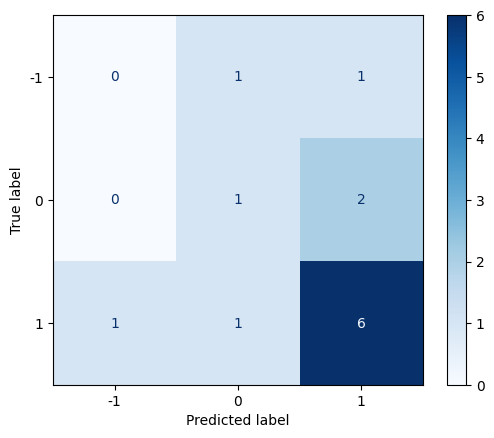

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(result_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[-1, 0, 1],)
disp.plot(cmap="Blues")

In [23]:
df_away_test=pd.read_csv('./data/Test_Data/test_away_team_statistics_df.csv')
df_home_test=pd.read_csv('./data/Test_Data/test_home_team_statistics_df.csv')
df_home_test.columns = [('HOME_' +str(col) ) if col != 'ID' else 'ID' for col in df_home_test.columns ]
df_joined_test=df_away_test.join(df_home_test.set_index('ID'), on='ID')
df_joined_test=df_joined_test.fillna(0.0)
df_final_test=df_joined_test.sort_values(by=['ID'])

In [25]:
df_final_test

,ID,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,...,HOME_TEAM_YELLOWCARDS_5_last_match_std,HOME_TEAM_REDCARDS_5_last_match_std,HOME_TEAM_OFFSIDES_5_last_match_std,HOME_TEAM_ATTACKS_5_last_match_std,HOME_TEAM_PENALTIES_5_last_match_std,HOME_TEAM_SUBSTITUTIONS_5_last_match_std,HOME_TEAM_BALL_SAFE_5_last_match_std,HOME_TEAM_DANGEROUS_ATTACKS_5_last_match_std,HOME_TEAM_INJURIES_5_last_match_std,HOME_TEAM_GOALS_5_last_match_std
0,12303,6.0,6.0,5.0,7.0,7.0,4.0,3.0,6.0,3.0,...,2.0,9.0,0.0,10.0,0.0,4.0,4.0,6.0,2.0,3.0
1,12304,4.0,4.0,4.0,4.0,3.0,8.0,8.0,4.0,7.0,...,9.0,10.0,3.0,1.0,8.0,3.0,8.0,1.0,0.0,2.0
2,12305,1.0,1.0,2.0,2.0,2.0,6.0,5.0,4.0,2.0,...,6.0,8.0,2.0,9.0,0.0,6.0,0.0,9.0,0.0,0.0
3,12306,6.0,9.0,6.0,9.0,4.0,4.0,4.0,1.0,10.0,...,4.0,5.0,2.0,3.0,8.0,0.0,2.0,2.0,2.0,3.0
4,12307,5.0,5.0,2.0,4.0,4.0,1.0,2.0,3.0,8.0,...,5.0,0.0,0.0,7.0,5.0,0.0,1.0,6.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25363,37666,8.0,8.0,6.0,10.0,7.0,8.0,8.0,10.0,3.0,...,2.0,6.0,2.0,1.0,5.0,6.0,6.0,5.0,2.0,0.0
25364,37667,7.0,4.0,4.0,9.0,8.0,7.0,6.0,3.0,9.0,...,3.0,0.0,2.0,8.0,0.0,0.0,4.0,8.0,10.0,10.0
25365,37668,3.0,4.0,2.0,3.0,1.0,1.0,1.0,3.0,4.0,...,7.0,0.0,8.0,4.0,0.0,7.0,0.0,2.0,0.0,3.0
25366,37669,5.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,5.0,...,5.0,0.0,4.0,7.0,8.0,5.0,6.0,4.0,5.0,4.0


In [26]:
yhat_test = LR_best.predict(df_final_test)
y_pred_test=pd.DataFrame(yhat_test)
y_pred_test.columns=['prediction']

In [27]:
y_pred_test.loc[y_pred_test['prediction'] == 1, 'HOME_WINS'] = 1
y_pred_test.loc[y_pred_test['prediction'] == 0 , 'DRAW'] = 1

y_pred_test.loc[y_pred_test['prediction'] == -1 , 'AWAY_WINS'] = 1

y_pred_test=y_pred_test.fillna(0)
y_pred_test['HOME_WINS'] = y_pred_test['HOME_WINS'].astype('int')
y_pred_test['DRAW'] = y_pred_test['DRAW'].astype('int')
y_pred_test['AWAY_WINS'] = y_pred_test['AWAY_WINS'].astype('int')
y_pred_test=y_pred_test.drop(['prediction'], axis=1)

In [28]:
y_pred_test

,HOME_WINS,DRAW,AWAY_WINS
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
25363,1,0,0
25364,0,0,0
25365,0,0,0
25366,0,0,0


In [29]:
test_prediction=pd.concat([df_final_test['ID'],y_pred_test], axis=1)

In [30]:
test_prediction.to_csv('./submission/logistic_benchmark_submission.csv', index=False)